In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
!pip3 install tqdm

  Using cached https://files.pythonhosted.org/packages/6c/4b/c38b5144cf167c4f52288517436ccafefe9dc01b8d1c190e18a6b154cd4a/tqdm-4.31.1-py2.py3-none-any.whl


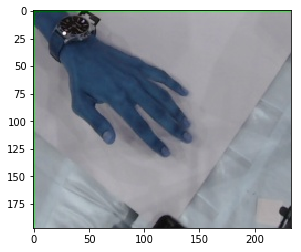

In [4]:
DATADIR = "/home/pruthvirg/Desktop/Posturize/Dataset/training_set/"
CATEGORIES = ["peace","stop","thumbs_up"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        
        break  # we just want one for now so break
    break  #...and one more!

In [5]:
IMG_SIZE = 100

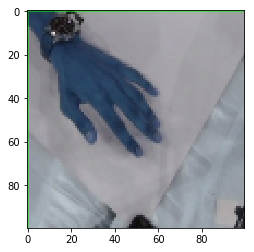

In [6]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


In [7]:
training_data = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [8]:
create_training_data()

100%|██████████| 1918/1918 [00:00<00:00, 3538.62it/s]


In [9]:
print(len(training_data))

5869


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:]:
    print(sample[1])

1
0
2
1
0
1
1
0
1
2
2
0
2
1
1
0
0
1
1
0
1
0
1
2
2
1
1
2
0
2
1
2
1
1
2
0
0
0
2
1
1
0
2
0
0
1
1
1
1
0
1
2
0
2
2
2
1
2
1
2
0
0
2
0
1
2
2
0
1
2
2
1
2
2
2
1
0
0
0
1
2
2
0
0
0
1
2
2
1
1
1
2
1
2
2
1
2
2
0
0
0
1
2
1
0
1
1
0
2
2
0
2
1
1
0
2
2
2
1
1
0
2
1
2
1
1
2
1
2
2
0
2
2
2
2
1
0
0
2
1
1
1
2
2
2
0
1
0
1
2
2
0
0
0
2
1
2
0
1
1
0
0
2
1
1
1
0
2
0
1
1
0
2
2
2
2
0
0
0
0
0
0
2
2
0
1
0
2
0
0
1
1
2
0
2
2
1
0
1
0
1
1
2
2
0
1
2
0
2
1
1
1
1
0
0
2
0
1
1
0
2
1
0
1
2
0
2
2
0
2
0
1
1
0
2
0
0
1
0
1
2
2
0
0
0
1
0
0
1
1
2
1
0
1
0
0
1
2
2
2
1
1
2
1
2
0
0
0
0
2
2
2
1
0
0
2
0
0
2
2
0
2
2
1
2
2
2
0
1
2
2
2
2
1
0
0
0
0
2
2
1
2
1
2
0
0
0
0
1
1
2
2
0
0
0
1
2
1
0
2
0
0
1
2
1
1
0
1
1
0
0
0
0
1
0
1
2
0
2
0
2
0
1
0
0
2
2
2
0
0
0
0
0
2
1
0
1
1
1
0
1
0
1
2
1
0
1
2
2
2
1
0
0
1
0
0
2
1
0
2
2
2
2
1
2
0
0
2
2
0
0
1
2
0
0
1
1
0
0
0
1
0
1
1
0
2
0
2
1
2
0
1
0
2
0
2
1
0
2
0
1
0
1
1
1
0
0
1
1
2
0
1
2
0
1
1
2
1
0
0
0
0
0
1
2
0
2
0
1
0
1
1
2
1
1
2
0
2
2
1
1
0
0
2
2
0
2
0
1
1
2
1
1
2
2
1
0
1
1
0
2
0
2
1
0
2
0
1
1
2
1
2
2
0
0
0
0
1
0
0


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [13]:
y = np_utils.to_categorical(y, num_classes=3)

In [14]:
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [15]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [16]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)